In [1]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.1 at tensorflow/core/framework/resource_handle.proto. Please update th

In [2]:
data_path = "dataset/train"
categories = ['Closed', 'Open']  # Adjust these labels as per your dataset structure
data = []
labels = []

In [3]:
for category in categories:
    folder_path = os.path.join(data_path, category)
    class_label = categories.index(category)  # Encode class labels as 0, 1
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        try:
            # Read and preprocess images
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale image
            resized_img = cv2.resize(img_array, (64, 64))           # Resize to 64x64
            data.append(resized_img)
            labels.append(class_label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

In [4]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [5]:
data = data / 255.0

In [6]:
labels = to_categorical(labels, num_classes=len(categories))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
X_train = np.expand_dims(X_train, axis=-1)  # Shape: (num_samples, 64, 64, 1)
X_test = np.expand_dims(X_test, axis=-1)    # Shape: (num_samples, 64, 64, 1)

In [9]:
print(f"X_train shape: {X_train.shape}")  # e.g., (3200, 64, 64, 1)
print(f"X_test shape: {X_test.shape}")    # e.g., (800, 64, 64, 1)
print(f"y_train shape: {y_train.shape}")  # e.g., (3200, 2)
print(f"y_test shape: {y_test.shape}")    # e.g., (800, 2)

X_train shape: (1161, 64, 64, 1)
X_test shape: (291, 64, 64, 1)
y_train shape: (1161, 2)
y_test shape: (291, 2)


In [10]:
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [11]:
data_gen.fit(X_train)

In [12]:
model = Sequential()

# Convolutional Layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(categories), activation='softmax'))  # Output layer with number of classes

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    data_gen.flow(X_train, y_train, batch_size=32),  # Use data augmentation
    epochs=20,
    validation_data=(X_test, y_test)                # Validate on test data
)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7261 - loss: 0.5224 - val_accuracy: 0.8694 - val_loss: 0.2986
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8553 - loss: 0.3380 - val_accuracy: 0.8729 - val_loss: 0.3465
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8966 - loss: 0.2533 - val_accuracy: 0.9278 - val_loss: 0.2412
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9294 - loss: 0.1799 - val_accuracy: 0.9210 - val_loss: 0.2716
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9449 - loss: 0.1464 - val_accuracy: 0.9622 - val_loss: 0.1060
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9561 - loss: 0.1128 - val_accuracy: 0.9725 - val_loss: 0.0712
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9647 - loss: 0.0977 - val_accuracy: 0.9416 - val_loss: 0.1326
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9673 - loss: 0.0778 - val_accuracy: 0.9622 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 


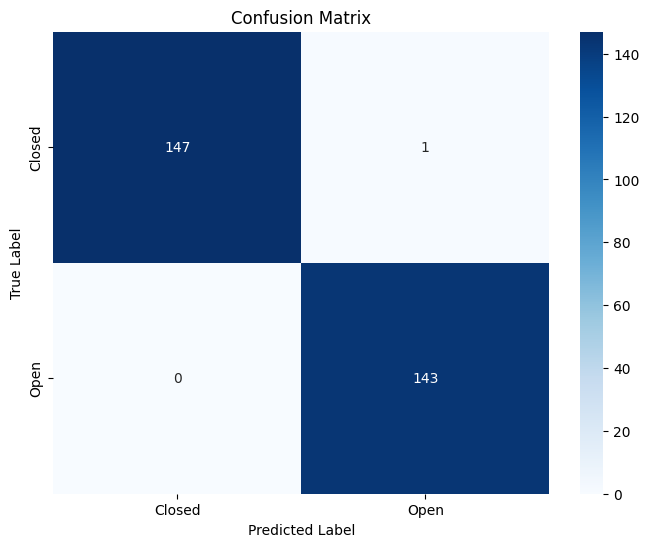

Classification Report:
              precision    recall  f1-score   support

      Closed       1.00      0.99      1.00       148
        Open       0.99      1.00      1.00       143

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)  # Predicted classes
y_true = np.argmax(y_test, axis=-1)  # True classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=categories))

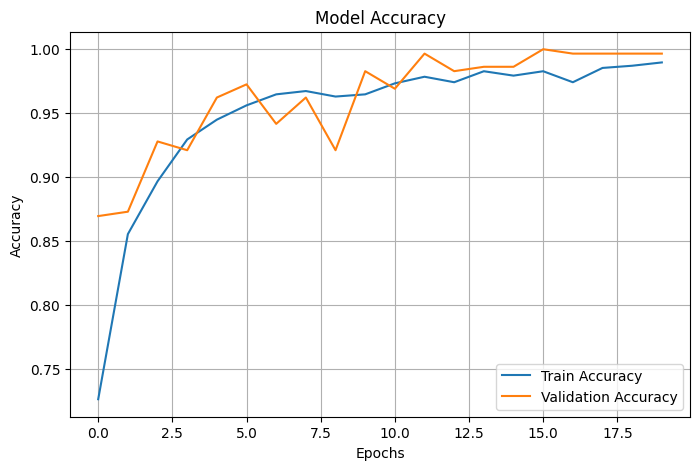

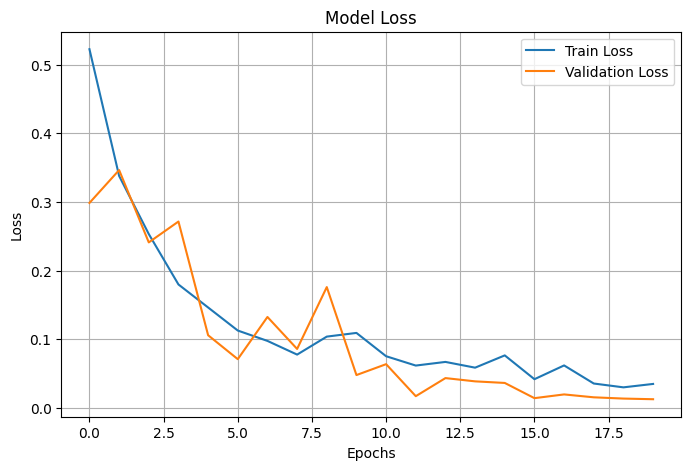

In [15]:
import matplotlib.pyplot as plt

# Assume you trained with:
# history = model.fit(...)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9966


In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
# model = load_model("cnn_eye_model.keras")

# Haarcascade for eye detection (comes with OpenCV)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Class names
class_names = ["Closed", "Open"]

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect eyes in the frame
    eyes = eye_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in eyes:
        # Crop the eye region
        eye_roi = gray_frame[y:y+h, x:x+w]

        # Preprocess for model (resize to 64x64, normalize, reshape)
        resized_img = cv2.resize(eye_roi, (64, 64))
        img = resized_img.astype("float32") / 255.0
        img = np.expand_dims(img, axis=-1)  # (64,64,1)
        img = np.expand_dims(img, axis=0)   # (1,64,64,1)

        # Predict
        preds = model.predict(img, verbose=0)
        # pred_class = 1 if preds[0][0] >= 0.5 else 0   # sigmoid output
        pred_class = np.argmax(preds, axis=1)[0]    # softmax output

        label = class_names[pred_class]

        # Draw rectangle & label
        color = (0, 255, 0) if label == "Open" else (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # Show the frame
    cv2.imshow("Eye State Detection", frame)

    # Quit on 'q'
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()
